<a href="https://colab.research.google.com/github/MohdYasser1/Mohamed-Salah-Shots-Visualization/blob/main/Mohamed_Salah_Shots_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing required package

In [14]:
!pip install understat
!pip install --upgrade understat
!pip install mplsoccer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 6.9 MB/s eta 0:00:00


## Getting Mohammed Salah Shots

In [17]:
import asyncio
import json

import aiohttp
import pandas as pd

from understat import Understat

async def main():
    async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        data = await understat.get_player_shots(1250)
        return data

if __name__ == '__main__':
    shots_data = await main()
    df = pd.DataFrame(shots_data)
    print(df.head())

      id minute       result                   X                    Y  \
0  15217     92  MissedShots  0.8230000305175781  0.36900001525878906   
1  20034     84    SavedShot                0.92   0.5320000076293945   
2  46908     87  BlockedShot  0.8859999847412109   0.5659999847412109   
3  47192      0    SavedShot  0.9640000152587891   0.6880000305175781   
4  47197     16  MissedShots                 0.9   0.6769999694824219   

                     xG         player h_a player_id situation season  \
0    0.0623646005988121  Mohamed Salah   h      1250  OpenPlay   2014   
1    0.4399380087852478  Mohamed Salah   a      1250  OpenPlay   2014   
2   0.09675999730825424  Mohamed Salah   h      1250  OpenPlay   2014   
3  0.049131400883197784  Mohamed Salah   a      1250  OpenPlay   2014   
4   0.06032019853591919  Mohamed Salah   a      1250  OpenPlay   2014   

   shotType match_id      h_team      a_team h_goals a_goals  \
0  LeftFoot     4720     Chelsea     Swansea       4      

In [8]:
df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,15217,92,MissedShots,0.8230000305175781,0.36900001525878906,0.0623646005988121,Mohamed Salah,h,1250,OpenPlay,2014,LeftFoot,4720,Chelsea,Swansea,4,2,2014-09-13 15:00:00,Eden Hazard,Pass
1,20034,84,SavedShot,0.92,0.5320000076293945,0.4399380087852478,Mohamed Salah,a,1250,OpenPlay,2014,LeftFoot,4560,Tottenham,Chelsea,5,3,2015-01-01 17:30:00,Eden Hazard,Pass
2,46908,87,BlockedShot,0.8859999847412109,0.5659999847412109,0.09675999730825424,Mohamed Salah,h,1250,OpenPlay,2014,LeftFoot,4929,Fiorentina,Atalanta,3,2,2015-02-08 11:30:00,Mario Gomez,BallTouch
3,47192,0,SavedShot,0.9640000152587891,0.6880000305175781,0.049131400883197784,Mohamed Salah,a,1250,OpenPlay,2014,LeftFoot,4937,Sassuolo,Fiorentina,1,3,2015-02-14 17:00:00,David Pizarro,Chipped
4,47197,16,MissedShots,0.9,0.6769999694824219,0.06032019853591919,Mohamed Salah,a,1250,OpenPlay,2014,LeftFoot,4937,Sassuolo,Fiorentina,1,3,2015-02-14 17:00:00,Khouma Babacar,Pass


In [21]:
# store data about only the 2023 season
df_2023 = df[df['season'] == '2023']
df_2023.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
985,532588,11,ShotOnPost,0.8190000152587891,0.5279999923706055,0.06408040970563889,Mohamed Salah,a,1250,OpenPlay,2023,RightFoot,22283,Chelsea,Liverpool,1,1,2023-08-13 15:30:00,Cody Gakpo,Pass
986,532592,25,BlockedShot,0.850999984741211,0.445,0.10087071359157562,Mohamed Salah,a,1250,OpenPlay,2023,LeftFoot,22283,Chelsea,Liverpool,1,1,2023-08-13 15:30:00,Luis Díaz,Pass
987,532594,40,MissedShots,0.8590000152587891,0.315,0.04292548820376396,Mohamed Salah,a,1250,OpenPlay,2023,LeftFoot,22283,Chelsea,Liverpool,1,1,2023-08-13 15:30:00,None,None
988,533205,33,MissedShots,0.8190000152587891,0.5720000076293945,0.05514945462346077,Mohamed Salah,h,1250,OpenPlay,2023,LeftFoot,22288,Liverpool,Bournemouth,3,1,2023-08-19 14:00:00,Diogo Jota,Pass
989,533207,35,Goal,0.9569999694824218,0.5259999847412109,0.6668094396591187,Mohamed Salah,h,1250,SetPiece,2023,LeftFoot,22288,Liverpool,Bournemouth,3,1,2023-08-19 14:00:00,None,Rebound


## Create Vizaualization about Mohammed Salah Shots

In [15]:
import pandas as pd

import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_base.py:5: RuntimeWarning: coroutine 'main' was never awaited
  from scipy._lib._util import VisibleDeprecationWarning


In [22]:
# Scale X and Y
df_2023['X'] = df_2023['X'].astype(float) * 100
df_2023['Y'] = df_2023['Y'].astype(float) * 100
df_2023.head()

<ipython-input-22-ed308fa45f9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['X'] = df_2023['X'].astype(float) * 100
<ipython-input-22-ed308fa45f9c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['Y'] = df_2023['Y'].astype(float) * 100


,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
985,532588,11,ShotOnPost,81.900002,52.799999,0.06408040970563889,Mohamed Salah,a,1250,OpenPlay,2023,RightFoot,22283,Chelsea,Liverpool,1,1,2023-08-13 15:30:00,Cody Gakpo,Pass
986,532592,25,BlockedShot,85.099998,44.500000,0.10087071359157562,Mohamed Salah,a,1250,OpenPlay,2023,LeftFoot,22283,Chelsea,Liverpool,1,1,2023-08-13 15:30:00,Luis Díaz,Pass
987,532594,40,MissedShots,85.900002,31.500000,0.04292548820376396,Mohamed Salah,a,1250,OpenPlay,2023,LeftFoot,22283,Chelsea,Liverpool,1,1,2023-08-13 15:30:00,None,None
988,533205,33,MissedShots,81.900002,57.200001,0.05514945462346077,Mohamed Salah,h,1250,OpenPlay,2023,LeftFoot,22288,Liverpool,Bournemouth,3,1,2023-08-19 14:00:00,Diogo Jota,Pass
989,533207,35,Goal,95.699997,52.599998,0.6668094396591187,Mohamed Salah,h,1250,SetPiece,2023,LeftFoot,22288,Liverpool,Bournemouth,3,1,2023-08-19 14:00:00,None,Rebound


In [25]:
total_shots = df_2023.shape[0]
total_goals = df_2023[df_2023['result'] == 'Goal'].shape[0]
total_xG = df_2023['xG'].astype(float).sum()
xG_per_shot = total_xG / total_shots
points_average_distance = df_2023['X'].mean()
actual_average_distance = 120 - (df_2023['X'] * 1.2).mean()
actual_average_distance

14.634737034847873

In [26]:
background_color = '#0C0D0E'

In [27]:
import matplotlib.font_manager as font_manager

font_path = '/content/Arvo-Regular.ttf'
font_prop = font_manager.FontProperties(fname=font_path)

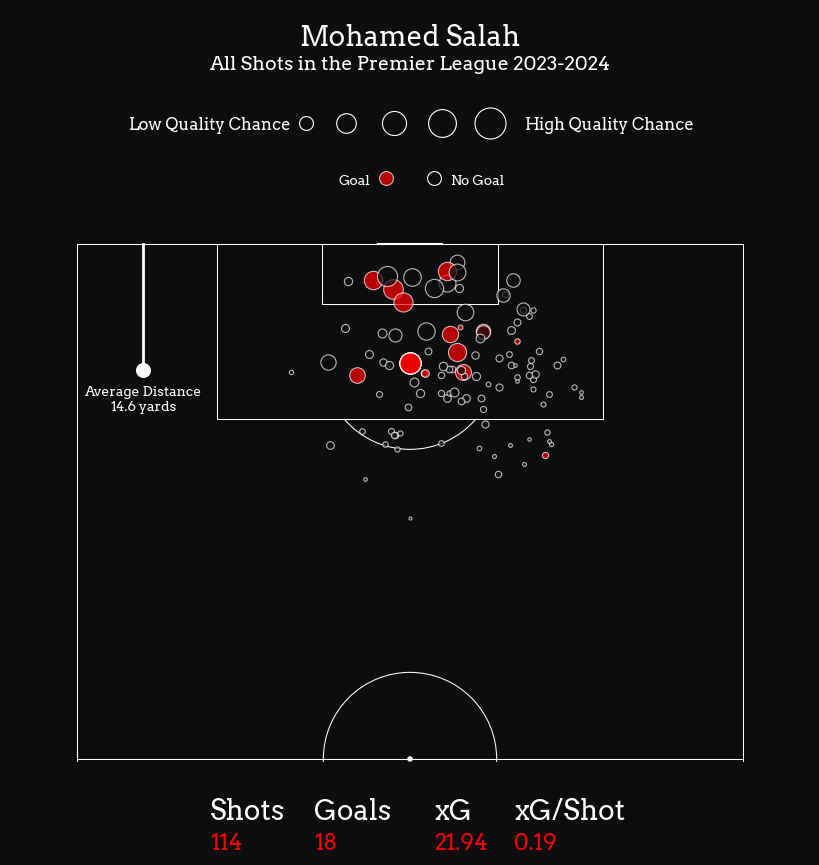

In [58]:
fig = plt.figure(figsize=(8, 12))
fig.patch.set_facecolor(background_color)

ax1 = fig.add_axes([0, .7, 1, .2])
ax1.set_facecolor(background_color)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)

ax1.text(
    x = 0.5,
    y = 0.85,
    s='Mohamed Salah',
    fontsize=20,
    fontproperties=font_prop,
    fontweight='bold',
    color='white',
    ha='center',
)

ax1.text(
    x = 0.5,
    y = 0.75,
    s='All Shots in the Premier League 2023-2024',
    fontsize=14,
    fontproperties=font_prop,
    fontweight='bold',
    color='white',
    ha='center',
)

ax1.text(
    x = 0.25,
    y = 0.5,
    s='Low Quality Chance',
    fontsize=12,
    fontproperties=font_prop,
    fontweight='bold',
    color='white',
    ha='center',
)

ax1.scatter(
    x=.37,
    y=.53,
    s=100,
    color = background_color,
    edgecolor='white',
    linewidth=.8,
)
ax1.scatter(
    x=.42,
    y=.53,
    s=200,
    color = background_color,
    edgecolor='white',
    linewidth=.8,
)
ax1.scatter(
    x=.48,
    y=.53,
    s=300,
    color = background_color,
    edgecolor='white',
    linewidth=.8,
)
ax1.scatter(
    x=.54,
    y=.53,
    s=400,
    color = background_color,
    edgecolor='white',
    linewidth=.8,
)
ax1.scatter(
    x=.6,
    y=.53,
    s=500,
    color = background_color,
    edgecolor='white',
    linewidth=.8,
)


ax1.text(
    x = 0.75,
    y = 0.5,
    s='High Quality Chance',
    fontsize=12,
    fontproperties=font_prop,
    fontweight='bold',
    color='white',
    ha='center',
)

ax1.text(
    x=.45,
    y=.27,
    s=f'Goal',
    fontsize=10,
    fontproperties=font_prop,
    color='white',
    ha='right',
)
ax1.scatter(
    x=.47,
    y=.3,
    s=100,
    color = 'red',
    edgecolor='white',
    linewidth=.8,
    alpha=.7
)
ax1.scatter(
    x=.53,
    y=.3,
    s=100,
    color = background_color,
    edgecolor='white',
    linewidth=.8,
)
ax1.text(
    x=.55,
    y=.27,
    s=f'No Goal',
    fontsize=10,
    fontproperties=font_prop,
    color='white',
    ha='left',
)

ax2 = fig.add_axes([.05, .25, .9, .5])
ax2.set_facecolor(background_color)

pitch = VerticalPitch(
    pitch_type='opta',
    half=True,
    pitch_color=background_color,
    pad_bottom=.5,
    line_color='white',
    linewidth=.75,
    axis=True,
    label=True
)

pitch.draw(ax=ax2)

ax2.scatter(
    x=90,
    y=points_average_distance,
    s=100,
    color = 'white',
    linewidth=.8
)
ax2.plot([90,90], [100, points_average_distance], color='white', linewidth=2)
ax2.text(
    x=90,
    y=points_average_distance-4,
    s=f'Average Distance\n{actual_average_distance:.1f} yards',
    fontsize=10,
    fontproperties=font_prop,
    color='white',
    ha='center',
)

for x in df_2023.to_dict(orient='records'):
  pitch.scatter(
      x['X'],
      x['Y'],
      s=300 * float(x['xG']),
      color = 'red' if x['result'] == 'Goal' else background_color,
      ax=ax2,
      alpha=.7,
      linewidth=.8,
      edgecolor='white'
  )





ax3 = fig.add_axes([0, .2, 1, .05])
ax3.set_facecolor(background_color)


ax3.text(
    x=.25,
    y=.5,
    s='Shots',
    fontsize=20,
    fontproperties=font_prop,
    fontweight='bold',
    color='white',
    ha='left',
)
ax3.text(x=.25, y=0, s=f'{total_shots}', fontsize=16, fontproperties=font_prop, color='red', ha='left')

ax3.text(
    x=.38,
    y=.5,
    s='Goals',
    fontsize=20,
    fontproperties=font_prop,
    fontweight='bold',
    color='white',
    ha='left',
)
ax3.text(x=.38, y=0, s=f'{total_goals}', fontsize=16, fontproperties=font_prop, color='red', ha='left')

ax3.text(
    x=.53,
    y=.5,
    s='xG',
    fontsize=20,
    fontproperties=font_prop,
    fontweight='bold',
    color='white',
    ha='left',
)
ax3.text(x=.53, y=0, s=f'{total_xG:.2f}', fontsize=16, fontproperties=font_prop, color='red', ha='left')

ax3.text(
    x=.63,
    y=.5,
    s='xG/Shot',
    fontsize=20,
    fontproperties=font_prop,
    fontweight='bold',
    color='white',
    ha='left',
)
ax3.text(x=.63, y=0, s=f'{xG_per_shot:.2f}', fontsize=16, fontproperties=font_prop, color='red', ha='left')

for ax in [ax1, ax2, ax3]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

In [59]:
plt.savefig('mohamed_salah_shots.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>